In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import gc

In [2]:
df_train = pd.read_csv('SalaryData_Train(1).csv')
df_test = pd.read_csv('SalaryData_Test(1).csv')

In [3]:
train_rep=df_train.copy()
test_rep= df_test.copy()

In [4]:
train_rep['tst']=0
test_rep['tst']=1

In [5]:
all_df= pd.concat([train_rep,test_rep],axis=0,copy=True)
del train_rep
del test_rep
gc.collect()

30

In [6]:
# # split the all-data DF into training and testing again
# training = all_df[all_df['tst']==0]
# testing = all_df[all_df['tst']==1]

# del all_df
# gc.collect()

## EDA and Visualization

In [7]:
all_df.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary,tst
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,0
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,0
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,0
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,0
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,0


In [8]:
all_df.isnull().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
tst              0
dtype: int64

In [9]:
all_df.columns

Index(['age', 'workclass', 'education', 'educationno', 'maritalstatus',
       'occupation', 'relationship', 'race', 'sex', 'capitalgain',
       'capitalloss', 'hoursperweek', 'native', 'Salary', 'tst'],
      dtype='object')

In [10]:
df_copy= all_df

In [11]:
def len_var(n):
    x=[]
    for i in range(1,n+1):
        x.append(i)
    return tuple(x)


In [12]:
df_copy['workclass'].replace((' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov',
       ' Local-gov', ' Self-emp-inc', ' Without-pay'),
                                      (len_var(7)), inplace=True)


df_copy['education'].replace((' Bachelors', ' HS-grad', ' 11th', ' Masters', ' 9th',
                       ' Some-college', ' Assoc-acdm', ' 7th-8th', ' Doctorate',
                       ' Assoc-voc', ' Prof-school', ' 5th-6th', ' 10th', ' Preschool',
                       ' 12th', ' 1st-4th'),
                             (len_var(16)),inplace=True)

df_copy['maritalstatus'].replace((' Never-married', ' Married-civ-spouse', ' Divorced',
                       ' Married-spouse-absent', ' Separated', ' Married-AF-spouse',' Widowed'),
                                         (len_var(7)),inplace=True)

df_copy['occupation'].replace((' Adm-clerical', ' Exec-managerial', ' Handlers-cleaners',
                       ' Prof-specialty', ' Other-service', ' Sales', ' Transport-moving',
                       ' Farming-fishing', ' Machine-op-inspct', ' Tech-support',
                       ' Craft-repair', ' Protective-serv', ' Armed-Forces',
                       ' Priv-house-serv'),
                              (len_var(14)),inplace=True)

df_copy['relationship'].replace((' Not-in-family', ' Husband', ' Wife', ' Own-child', ' Unmarried',
                           ' Other-relative'),
                                (len_var(6)),inplace=True)

df_copy['race'].replace((' White', ' Black', ' Asian-Pac-Islander', ' Amer-Indian-Eskimo',
                   ' Other'),
                        (len_var(5)),inplace=True)

df_copy['sex'].replace((' Male', ' Female'),
                       (1,2),inplace=True)

df_copy['native'].replace((' United-States', ' Cuba', ' Jamaica', ' India', ' Mexico',
                       ' Puerto-Rico', ' Honduras', ' England', ' Canada', ' Germany',
                       ' Iran', ' Philippines', ' Poland', ' Columbia', ' Cambodia',
                       ' Thailand', ' Ecuador', ' Laos', ' Taiwan', ' Haiti', ' Portugal',
                       ' Dominican-Republic', ' El-Salvador', ' France', ' Guatemala',
                       ' Italy', ' China', ' South', ' Japan', ' Yugoslavia', ' Peru',
                       ' Outlying-US(Guam-USVI-etc)', ' Scotland', ' Trinadad&Tobago',
                       ' Greece', ' Nicaragua', ' Vietnam', ' Hong', ' Ireland',
                       ' Hungary'),
                          (len_var(40)),inplace=True)

df_copy['Salary'].replace((' <=50K', ' >50K'),
                          (1,2),inplace=True)


In [13]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45221 entries, 0 to 15059
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   age            45221 non-null  int64
 1   workclass      45221 non-null  int64
 2   education      45221 non-null  int64
 3   educationno    45221 non-null  int64
 4   maritalstatus  45221 non-null  int64
 5   occupation     45221 non-null  int64
 6   relationship   45221 non-null  int64
 7   race           45221 non-null  int64
 8   sex            45221 non-null  int64
 9   capitalgain    45221 non-null  int64
 10  capitalloss    45221 non-null  int64
 11  hoursperweek   45221 non-null  int64
 12  native         45221 non-null  int64
 13  Salary         45221 non-null  int64
 14  tst            45221 non-null  int64
dtypes: int64(15)
memory usage: 5.5 MB


<AxesSubplot:>

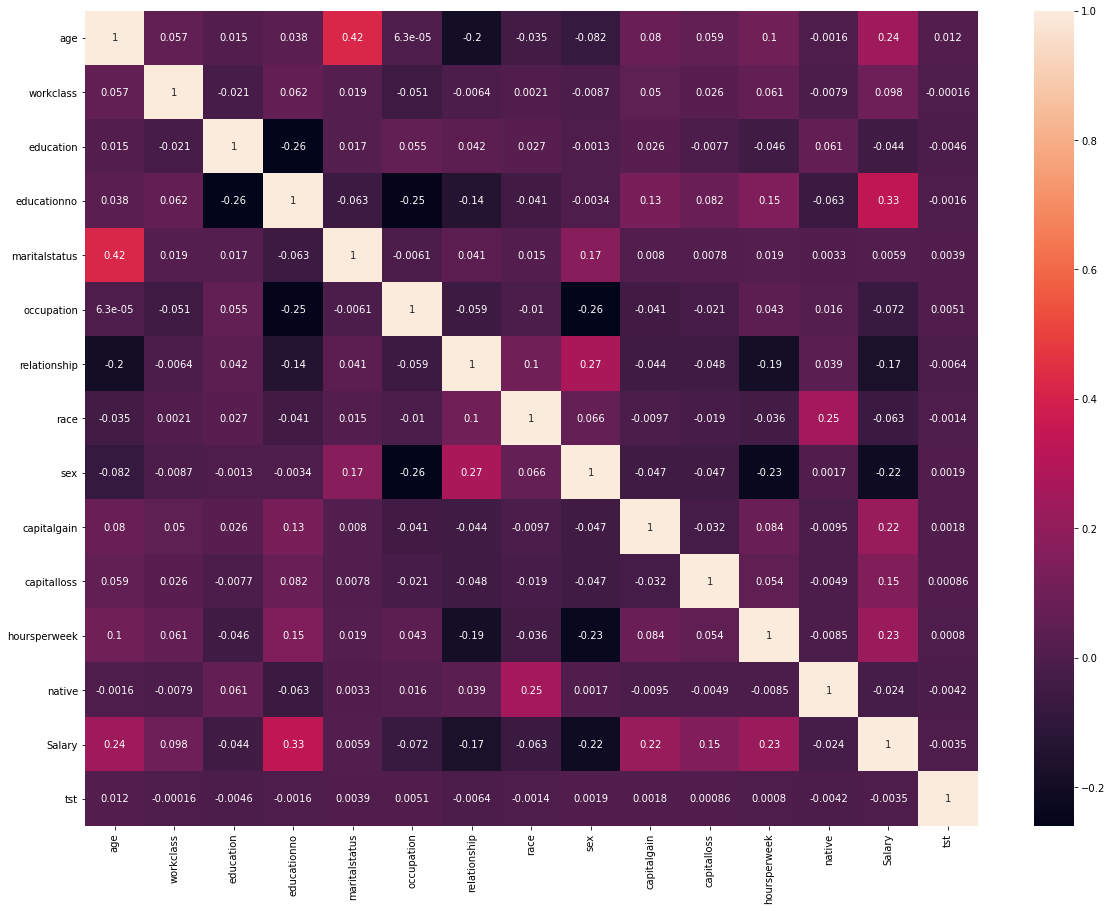

In [14]:
plt.figure(figsize=(20,15))
sns.heatmap(df_copy.corr(),annot=True)

Here we can see that Salary is highly correlated with age, educationNo,sex, relationship and hoursPerWeek

In [15]:
#taking sample of the dataset
df_sample= df_copy.sample(frac=.02)

In [16]:
df_sample

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary,tst
18737,37,3,2,9,3,9,5,2,2,0,0,40,1,1,0
11009,37,3,6,10,2,2,3,1,2,0,0,45,1,2,0
19586,28,3,6,10,2,11,2,1,1,0,0,45,1,1,0
9063,30,5,2,9,2,1,2,2,1,0,0,40,1,1,0
4737,43,2,1,13,2,2,2,1,1,0,0,60,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4889,39,3,3,7,3,5,5,1,2,0,0,40,1,1,1
7536,29,3,6,10,1,6,1,1,1,0,0,40,1,1,1
23380,38,3,2,9,2,3,2,1,1,0,0,40,1,1,0
12067,53,3,2,9,1,1,6,1,1,0,0,35,1,1,0


<Figure size 1440x1080 with 0 Axes>

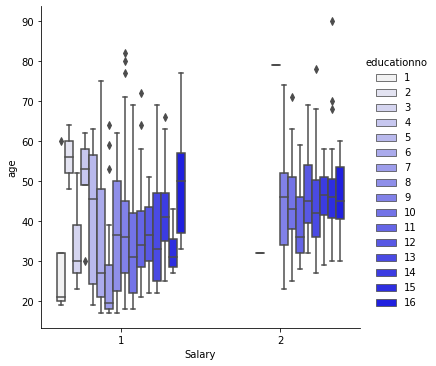

In [17]:
plt.figure(figsize=(20,15))
sns.catplot(x='Salary',y='age',hue='educationno',
            palette='light:b',kind='box',data=df_sample)

We can see that people with good education have high chances of earning above 50k later in the career. Majority of the people earning salary below 50k are below the age of 45 while people earning salary above 50k are in the age group of 45-55.

<Figure size 1440x1080 with 0 Axes>

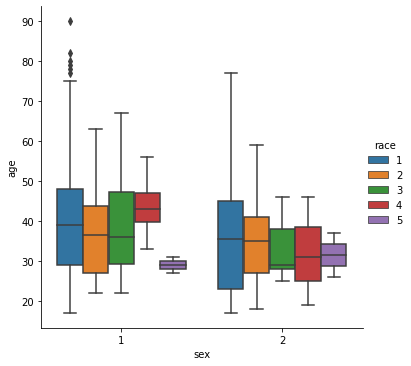

In [18]:
plt.figure(figsize=(20,15))
sns.catplot(x='sex',y='age',hue='race',
            kind='box',data=df_sample)

More Men are engaged in occupation compared to women irrespective of the race

<Figure size 1440x1080 with 0 Axes>

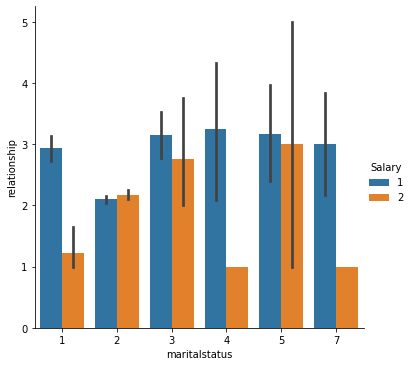

In [19]:
plt.figure(figsize=(20,15))
sns.catplot(x='maritalstatus',y='relationship',hue='Salary',
            kind='bar',data=df_sample)

Maximum people in group of 'Married-spouse-absent', 'Widowed' and 'Separated' tend to earn salary below 50k

<Figure size 1440x1080 with 0 Axes>

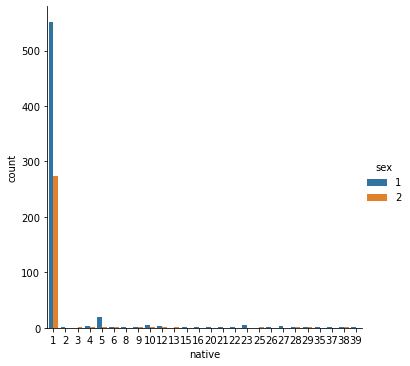

In [20]:
plt.figure(figsize=(20,15))
sns.catplot(x='native',hue='sex',
            kind='count',data=df_sample)

Women in US tends to earn above 50k while men in US tends to earn below 50k. 

<Figure size 1440x1080 with 0 Axes>

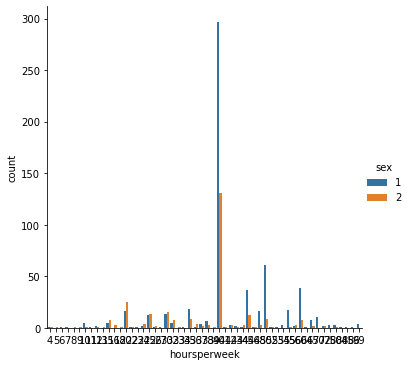

In [21]:
plt.figure(figsize=(20,15))
sns.catplot(x='hoursperweek',hue='sex',
            kind='count',data=df_sample)

Men tend to work more hours as compared to women

In [49]:
# split the all-data DF into training and testing again
training = df_sample[df_sample['tst']==0]
testing = df_sample[df_sample['tst']==1]


gc.collect()

4064

In [51]:
training=training.iloc[:,:14]
testing=testing.iloc[:,:14]

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
4737,43,2,1,13,2,2,2,1,1,0,0,60,1,1
6710,29,3,10,11,2,1,2,1,1,0,0,40,1,1
11271,38,2,1,13,1,5,4,1,2,0,0,20,1,1
9460,58,4,4,14,2,10,2,3,1,7688,0,40,27,2
3334,45,3,5,5,2,3,2,1,1,0,0,40,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
688,37,1,1,13,2,1,3,2,2,0,0,45,1,2
10369,31,3,2,9,1,6,4,1,1,0,0,40,1,1
4889,39,3,3,7,3,5,5,1,2,0,0,40,1,1
7536,29,3,6,10,1,6,1,1,1,0,0,40,1,1


In [52]:
x_train=training.iloc[:,:13]
x_test=testing.iloc[:,:13]
y_train=training.iloc[:,13]
y_test=testing.iloc[:,13]

In [53]:
from sklearn.svm import SVC

In [54]:
#kernel=linear
model_li=SVC(kernel='linear')
model_li.fit(x_train,y_train)
pred_li=model_li.predict(x_test)
np.mean(pred_li==y_test)

0.7935483870967742

In [55]:
#kernel=rbf
model_li=SVC(kernel='rbf')
model_li.fit(x_train,y_train)
pred_li=model_li.predict(x_test)
np.mean(pred_li==y_test)

0.7903225806451613

In [56]:
#kernel=sigmoid
model_li=SVC(kernel='sigmoid')
model_li.fit(x_train,y_train)
pred_li=model_li.predict(x_test)
np.mean(pred_li==y_test)

0.7838709677419354

In [57]:
#kernel=poly
model_li=SVC(kernel='poly')
model_li.fit(x_train,y_train)
pred_li=model_li.predict(x_test)
np.mean(pred_li==y_test)

0.7709677419354839